In [1]:
import cv2
import ffmpegcv
from tqdm.autonotebook import tqdm as notebook_tqdm
#from tqdm.auto import tqdm
from ultralytics import YOLO
import json
import pandas as pd
import numpy as np
import os

/tmp/ipykernel_3495094/4089313914.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm as notebook_tqdm


In [12]:
VIDEO_PATH = '/home/skorp321/Projects/panorama/data/Swiss_vs_Slovakia-panoramic_video.mp4'
MODEL_PATH = '/home/skorp321/Projects/panorama/models/yolov8m_goalkeeper_1280.pt'

ROOT_PATH = "/home/skorp321/Projects/panorama/data/"

img_path = '/home/skorp321/Projects/panorama/data/frame_001.jpg'
soccer_field_path_anno = '/home/skorp321/Projects/panorama/data/soccer_field_anno/annotations/person_keypoints_default.json'
soccer_panorama_path_anno = '/home/skorp321/Projects/panorama/data/Swiss_vs_Slovakia-panoramic_video_anno/annotations/person_keypoints_default.json'

In [13]:
model = YOLO(MODEL_PATH)

In [14]:
with open(soccer_field_path_anno, 'r') as file:
    # Чтение всего содержимого файла в одну строку
    data = file.read()

# Преобразование строки в словарь с помощью метода loads
data_dict = json.loads(data)

categoris = data_dict['categories'][0]['keypoints']
df = data_dict['annotations'][0]['keypoints']

res = {}
for i, data in enumerate(categoris):
    res[data] = df[(i*3):((i+1)*3)-1]
    
sorted_list = sorted(res.items(), key=lambda x: x[0])

# Преобразуем список обратно в словарь
sorted_dict = {k: v for k, v in sorted_list}

field = list(sorted_dict.values())

In [15]:
with open(soccer_panorama_path_anno, 'r') as file:
    # Чтение всего содержимого файла в одну строку
    data = file.read()

# Преобразование строки в словарь с помощью метода loads
data_dict = json.loads(data)

categoris = data_dict['categories'][0]['keypoints']
df = data_dict['annotations'][0]['keypoints']

res = {}
for i, data in enumerate(categoris):
    res[data] = df[(i*3):((i+1)*3)-1]
    
sorted_list = sorted(res.items(), key=lambda x: x[0])

# Преобразуем список обратно в словарь
sorted_dict = {k: v for k, v in sorted_list}

layout = list(sorted_dict.values())

In [16]:
H, _ = cv2.findHomography(np.array(layout), np.array(field))
np.save(os.path.join(ROOT_PATH,'h_matrix_path'), H)
H

array([[     1.6934,       5.212,     -2891.5],
       [  0.0061107,      8.6304,     -910.02],
       [ 6.1929e-06,    0.012385,           1]])


0: 224x1280 17 players, 92.3ms
Speed: 1.4ms preprocess, 92.3ms inference, 312.9ms postprocess per image at shape (1, 3, 224, 1280)
Results saved to /home/skorp321/Projects/Terralink/runs/detect/predict5
2041 179 2060 222
1836 372 1853 424
1830 180 1844 216
2407 375 2425 421
1489 243 1503 285
2073 119 2083 149
1487 166 1508 201
2025 267 2041 308
2123 152 2143 185
1967 119 1985 156
2568 173 2586 210
1738 137 1752 169
1994 138 2008 176
1769 112 1786 146
2170 185 2186 222
1866 198 1881 238
1950 106 1964 141


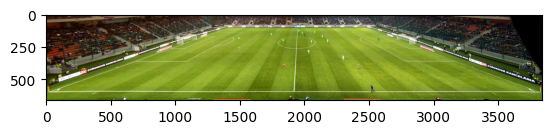

In [17]:
from matplotlib import pyplot as plt


collors = [(0,0,255), (0,255,0), (255,0,0), (125,125,0)]
frame = cv2.imread(img_path)
outputs = model(frame, save=True)
for result in outputs:
    boxes = result.boxes  # Boxes object for bounding box outputs
    
    for box in boxes.data:
        x1, y1 = int(box[0]), int(box[1])
        x2, y2 = int(box[2]), int(box[3])
        w = x2 - x1
        h = y2 - y1
        cls = int(box[5])
        collor = collors[cls]
        
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), collor, 1)
        
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.imsave(os.path.join(ROOT_PATH, 'img1.jpg'), frame)
plt.show()